# Real Estate Price Prediction Project
## Preprocessing 1
### Import libraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')
print(df.shape)
df.head()

(13320, 9)


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
print(len(df.location.value_counts()))
print(len(df.society.value_counts()))

1305
2688


<AxesSubplot:>

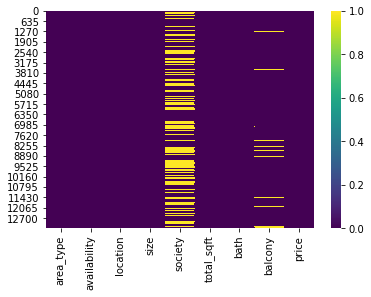

In [7]:
sns.heatmap(df.isna(), cmap='viridis')

In [8]:
print(df.society.isna().sum())
print(df.balcony.isna().sum())

5502
609


### Data Cleaning

In [9]:
df0 = df.drop(['area_type','availability','society','balcony'], axis=1)
df0.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df0.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
#Drop NaN values
df0 = df0.dropna()
df0.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

#### Converting Lakh ₹ to USD $

In [12]:
def lakh_to_usd(n):
    currency = 11089.55
    return round(n*currency,2)

In [13]:
df0.price = df0.price.apply(lakh_to_usd)

In [14]:
df0.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,433268.72
1,Chikka Tirupathi,4 Bedroom,2600,5.0,1330746.00
2,Uttarahalli,3 BHK,1440,2.0,687552.10
3,Lingadheeranahalli,3 BHK,1521,3.0,1053507.25
4,Kothanur,2 BHK,1200,2.0,565567.05


#### Converting Square Foot to Meter

In [15]:
def sqft_to_meter(n):
    n = float(n)
    return round(n/10.764,2)

def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

def sqft_to_float(x):
    tokens = []
    if type(x) != type(float()):
        tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [16]:
df0[~df0.total_sqft.apply(is_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,2062656.30
122,Hebbal,4 BHK,3067 - 8156,4.0,5289715.35
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,598891.15
165,Sarjapur,2 BHK,1145 - 1340,2.0,482284.53
188,KR Puram,2 BHK,1015 - 1540,2.0,629886.44
...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,423509.91
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,1352925.10
13059,Harlur,2 BHK,1200 - 1470,2.0,806875.66
13265,Hoodi,2 BHK,1133 - 1384,2.0,655780.54


In [17]:
df0.total_sqft = df0.total_sqft.apply(sqft_to_float)
df0 = df0.dropna()
df0.bath = df0.bath.apply(lambda x: int(x))

In [18]:
df0['total_sqmeter'] = df0.total_sqft.apply(sqft_to_meter)
df1 = df0.copy()
cols = df1.columns.tolist()
cols = cols[:2] + cols[-1:] + cols[3:5]
df1 = df1[cols]
df1.head()

,location,size,total_sqmeter,bath,price
0,Electronic City Phase II,2 BHK,98.10,2,433268.72
1,Chikka Tirupathi,4 Bedroom,241.55,5,1330746.00
2,Uttarahalli,3 BHK,133.78,2,687552.10
3,Lingadheeranahalli,3 BHK,141.30,3,1053507.25
4,Kothanur,2 BHK,111.48,2,565567.05


In [19]:
print(df1['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [20]:
df1['size'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [21]:
df1.rename(columns={'size':'BHK'}, inplace=True)
print(df1.shape)
df1.head(10)

(13200, 5)


,location,BHK,total_sqmeter,bath,price
0,Electronic City Phase II,2,98.10,2,433268.72
1,Chikka Tirupathi,4,241.55,5,1330746.00
2,Uttarahalli,3,133.78,2,687552.10
3,Lingadheeranahalli,3,141.30,3,1053507.25
4,Kothanur,2,111.48,2,565567.05
5,Whitefield,2,108.70,2,421402.90
6,Old Airport Road,4,253.81,4,2262268.20
7,Rajaji Nagar,4,306.58,4,6653730.00
8,Marathahalli,3,121.70,3,701414.04
9,Gandhi Bazar,6,94.76,6,4103133.50


### Feature Engineering

In [22]:
df2 = df1.copy()
#Adding new feature 'price_per_sqmeter'
df2['price_per_sqmeter'] = df2.price/df2.total_sqmeter
df2.head()

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
0,Electronic City Phase II,2,98.10,2,433268.72,4416.602650
1,Chikka Tirupathi,4,241.55,5,1330746.00,5509.194784
2,Uttarahalli,3,133.78,2,687552.10,5139.423681
3,Lingadheeranahalli,3,141.30,3,1053507.25,7455.819179
4,Kothanur,2,111.48,2,565567.05,5073.260226


In [23]:
print(len(df2.location.unique()))
df2.location.value_counts()

1298


Whitefield         532
Sarjapur  Road     392
Electronic City    302
Kanakpura Road     264
Thanisandra        232
                  ... 
1 Giri Nagar         1
Sathanur             1
Chikkaballapur       1
Virgonagar           1
Defence Layout       1
Name: location, Length: 1298, dtype: int64

In [24]:
locations_stats = df2['location'].value_counts()
#Reducing the number of location by grouping the locations counted less than 10 times
locations_stats_less_than_10 = locations_stats[locations_stats<=10]
len(locations_stats_less_than_10)

1058

In [25]:
df2.location = df2.location.apply(lambda x: 'other' if x in locations_stats_less_than_10 else x)
len(df2.location.unique())

241

In [26]:
df2.head(10)

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
0,Electronic City Phase II,2,98.10,2,433268.72,4416.602650
1,Chikka Tirupathi,4,241.55,5,1330746.00,5509.194784
2,Uttarahalli,3,133.78,2,687552.10,5139.423681
3,Lingadheeranahalli,3,141.30,3,1053507.25,7455.819179
4,Kothanur,2,111.48,2,565567.05,5073.260226
5,Whitefield,2,108.70,2,421402.90,3876.751610
6,Old Airport Road,4,253.81,4,2262268.20,8913.235097
7,Rajaji Nagar,4,306.58,4,6653730.00,21703.079131
8,Marathahalli,3,121.70,3,701414.04,5763.467872
9,other,6,94.76,6,4103133.50,43300.269101


### Removing Outliers

In [43]:
df2.shape

(13200, 6)

In [42]:
#Number of instances which has less than 25 sqmeter for a room
df2[(df2.total_sqmeter/df2.BHK<25)]

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
9,other,6,94.76,6,4103133.50,43300.269101
45,HSR Layout,8,55.74,9,2217910.00,39790.276283
58,Murugeshpalya,6,130.71,4,1663432.50,12726.130365
68,other,8,125.42,7,942611.75,7515.641445
70,other,3,46.45,3,1108955.00,23874.165770
...,...,...,...,...,...,...
13221,other,9,109.44,9,831716.25,7599.746436
13277,other,7,130.06,7,2417521.90,18587.743349
13279,other,6,111.48,5,1441641.50,12931.839792
13303,Vidyaranyapura,5,71.91,5,776268.50,10795.000695


In [50]:
df3 = df2[~(df2.total_sqmeter/df2.BHK<25)]
df3.shape

(12532, 6)

In [58]:
df3.price_per_sqmeter.describe()

count     12532.000000
mean       7553.979701
std        5004.108499
min         319.702689
25%        5025.977453
50%        6324.975051
75%        8287.809282
max      210667.743161
Name: price_per_sqmeter, dtype: float64

In [72]:
# Remove extreme outliers in function of the location and the Gaussian Distribution
def remove_outliers(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqmeter)
        std = np.std(subdf.price_per_sqmeter)
        df_reduced = subdf[(subdf.price_per_sqmeter>(m-std)) & (subdf.price_per_sqmeter<=(m+std))]
        df_output = pd.concat([df_output,df_reduced], ignore_index=True)
    return df_output

In [74]:
df4 = remove_outliers(df3)
df4.shape

(10342, 6)

In [81]:
def plot_scatter_chart(df,location):
    plt.figure(figsize=(10,7))
    bhk2 = df[(df.location==location)&(df.BHK==2)]
    bhk3 = df[(df.location==location)&(df.BHK==3)]
    plt.scatter(bhk2.total_sqmeter,bhk2.price,color='blue', label='2 BHK')
    plt.scatter(bhk3.total_sqmeter,bhk3.price,color='red', label='3 BHK')
    plt.xlabel('Total Square Meter Area')
    plt.ylabel('Price per Square Meter')
    plt.title(location)
    plt.legend()

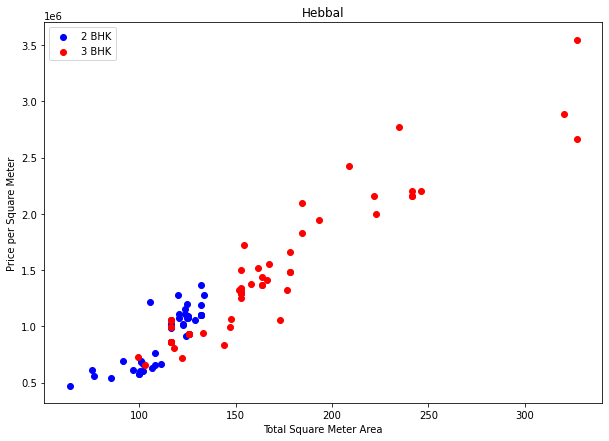

In [83]:
plot_scatter_chart(df4, 'Hebbal')

Text(0, 0.5, 'Count')

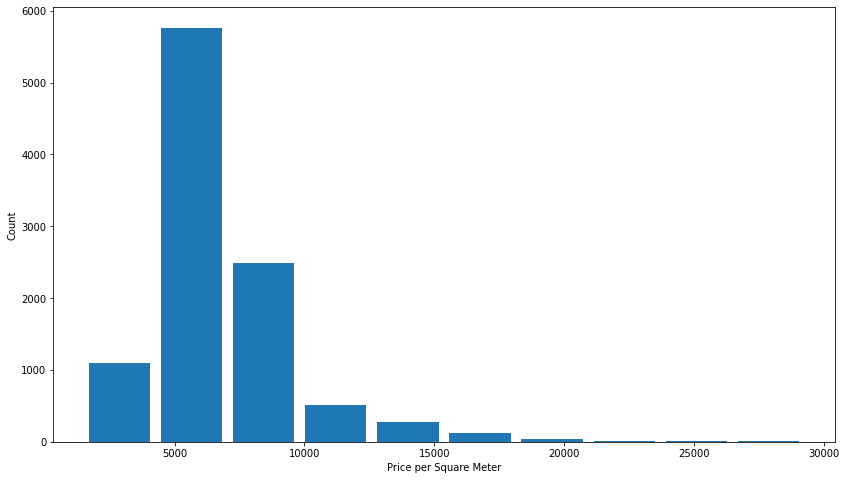

In [93]:
plt.figure(figsize=(14,8))
plt.hist(df4.price_per_sqmeter, rwidth=0.85)
plt.xlabel('Price per Square Meter')
plt.ylabel('Count')

In [95]:
df4.bath.unique()

array([ 2,  3,  4,  5,  8,  1,  6,  7,  9, 12, 27, 16, 13], dtype=int64)

In [97]:
df4[df4.bath>df4.BHK+2]

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
1668,Chikkabanavar,4,228.54,7,887164.0,3881.876258
5287,Nagasandra,4,650.32,8,4990297.5,7673.602995
6776,Thanisandra,3,167.78,6,1286387.8,7667.110502
8484,other,6,1053.33,9,11089550.0,10528.087114


Text(0, 0.5, 'Count')

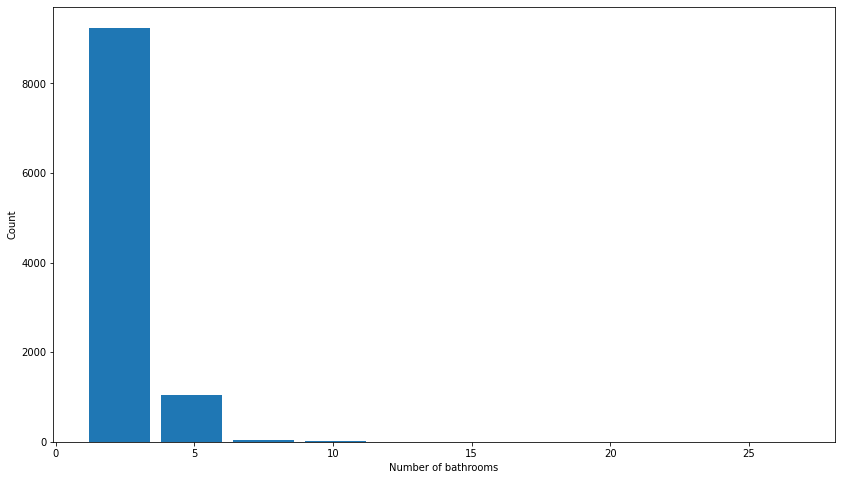

In [94]:
plt.figure(figsize=(14,8))
plt.hist(df4.bath, rwidth=0.85)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [99]:
df4 = df4[df4.bath<df4.BHK+2]
df4

,location,BHK,total_sqmeter,bath,price,price_per_sqmeter
0,Devarachikkanahalli,3,116.13,2,487940.20,4201.672264
1,Devarachikkanahalli,2,116.13,2,443582.00,3819.702058
2,Devarachikkanahalli,2,111.48,2,920432.65,8256.482329
3,Devarachikkanahalli,2,108.70,2,443582.00,4080.791168
4,Devarachikkanahalli,3,132.39,2,720820.75,5444.676713
...,...,...,...,...,...,...
10337,other,2,125.70,2,1219850.50,9704.459029
10338,other,1,75.44,1,288328.30,3821.955196
10339,other,3,133.78,2,708954.93,5299.408955
10340,other,2,99.87,2,532298.40,5329.912887


## Exporting the data for Model Building

In [101]:
df5 = df4.drop(['price_per_sqmeter'],axis=1)
df5

,location,BHK,total_sqmeter,bath,price
0,Devarachikkanahalli,3,116.13,2,487940.20
1,Devarachikkanahalli,2,116.13,2,443582.00
2,Devarachikkanahalli,2,111.48,2,920432.65
3,Devarachikkanahalli,2,108.70,2,443582.00
4,Devarachikkanahalli,3,132.39,2,720820.75
...,...,...,...,...,...
10337,other,2,125.70,2,1219850.50
10338,other,1,75.44,1,288328.30
10339,other,3,133.78,2,708954.93
10340,other,2,99.87,2,532298.40


In [102]:
df5.to_csv('Bengaluru_House_Data_Processed.csv', index=False)